In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import time
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [1]:
!pip install pmdarima


In [10]:
dfb3 = pd.read_csv('Data/Building Data/Building 3.csv')

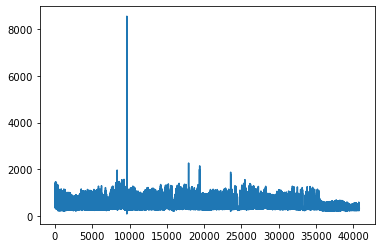

In [11]:
plt.plot(dfb3['series_value'])

In [12]:
dfb3 = dfb3[33500:35000]

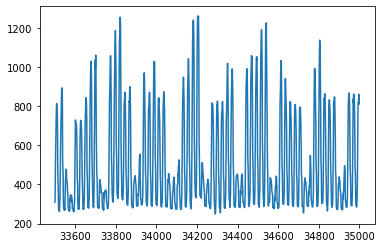

In [13]:
plt.plot(dfb3['series_value'])

In [19]:
dfb3

,Unnamed: 0,series_value,datetime,Year,Month,Day_of_Month,Hour,minutes,series_name
33500,134555,309.0,2020-01-01 19:00:00,2020,1,1,19,0,Building3
33501,134559,338.0,2020-01-01 20:00:00,2020,1,1,20,0,Building3
33502,134563,451.0,2020-01-01 21:00:00,2020,1,1,21,0,Building3
33503,134567,529.0,2020-01-01 22:00:00,2020,1,1,22,0,Building3
33504,134571,608.0,2020-01-01 23:00:00,2020,1,1,23,0,Building3
...,...,...,...,...,...,...,...,...,...
34995,140535,827.0,2020-03-04 02:00:00,2020,3,4,2,0,Building3
34996,140539,842.0,2020-03-04 03:00:00,2020,3,4,3,0,Building3
34997,140543,858.0,2020-03-04 04:00:00,2020,3,4,4,0,Building3
34998,140547,860.0,2020-03-04 05:00:00,2020,3,4,5,0,Building3


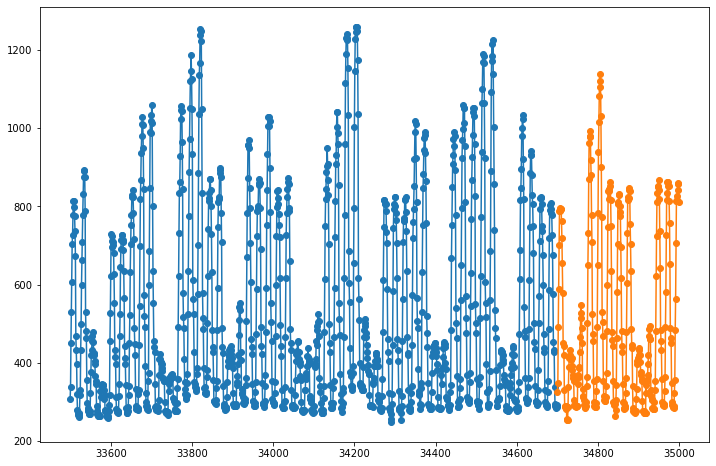

In [20]:
train_size = 0.8

ts = dfb3['series_value']

split_idx = round(len(dfb3['series_value'])* train_size)

# Split
train = ts.iloc[:split_idx]
test = ts.iloc[split_idx:]

# Visualize split
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(train, label='Train', **kws)
plt.plot(test, label='Test', **kws)

In [21]:
modelactual = auto_arima(train, start_p=0, start_q=0, seasonal=True)
modelactual.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:               SARIMAX(5, 0, 3)   Log Likelihood               -6276.042
Date:                Tue, 27 Sep 2022   AIC                          12572.085
Time:                        23:07:34   BIC                          12622.985
Sample:                             0   HQIC                         12591.258
                               - 1200                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     55.9519      7.569      7.393      0.000      41.118      70.786
ar.L1          1.5445      0.079     19.464      0.000       1.389       1.700
ar.L2         -1.1892      0.101    -11.752      0.000      -1.388      -0.991
ar.L3          1.5497      0.076     20.461      0.000       1.401       1.698
ar.L4         -1.1739      0.107    -10.953      0.000      -1.384      -0.964
ar.L5          0.1588      0.067      2.374      0.018       0.028       0.290
ma.L1         -0.0880      0.075     -1.174      0.240      -0.235       0.059
ma.L2          0.6489      0.037     17.465      0.000       0.576       0.722
ma.L3         -0.6079      0.071     -8.510      0.000      -0.748      -0.468
sigma2      2140.2070     77.521     27.608      0.000    1988.269    2292.145
===================================================================================
Ljung-Box (L1) (Q):                   1.59   Jarque-Bera (JB):               646.14
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             0.16
Prob(H) (two-sided):                  0.62   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
data = train
# define model
my_order = (5, 1, 3)
my_seasonal_order = (5, 1, 3, 24)
model = SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
# fit model
model_fit = model.fit()
# one step forecast
yhat = model_fit.predict(end=len(test))

C:\Users\sohan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\sohan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sohan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
yhat

33500       0.000000
33501     309.121467
33502     338.110881
33503     451.152489
33504     529.147606
            ...     
33796    1112.687755
33797    1130.844290
33798    1140.068591
33799    1154.571361
33800    1050.011569
Name: predicted_mean, Length: 301, dtype: float64

In [27]:
lst = []
for i in range(33501, 33801):
    lst.append(yhat[i])

In [28]:
forecastdf = pd.DataFrame(lst, columns=['forecast']) 

In [29]:
test

34700    325.0
34701    348.0
34702    492.0
34703    589.0
34704    702.0
         ...  
34995    827.0
34996    842.0
34997    858.0
34998    860.0
34999    811.0
Name: series_value, Length: 300, dtype: float64

In [30]:
lst = []
for i in range(34700, 35000):
    lst.append(test[i])

In [31]:
testdfnew = pd.DataFrame(lst, columns=['test']) 

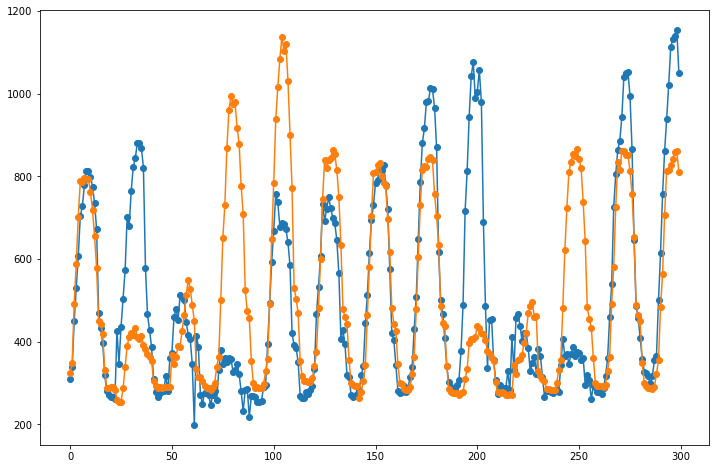

In [32]:
fig,ax= plt.subplots(figsize=(12,8))
kws = dict(marker='o')
plt.plot(forecastdf['forecast'], label='Forecast', **kws)
plt.plot(testdfnew['test'], label='Test', **kws)

In [33]:
from sklearn.metrics import mean_absolute_error
import numpy as np

def mean_absolute_scaled_error(y_true, y_pred, y_train):
    e_t = y_true - y_pred
    scale = mean_absolute_error(y_train[1:], y_train[:-1])
    return np.mean(np.abs(e_t / scale))


pred = forecastdf['forecast'] 
tst = testdfnew['test']
trn = train

mean_absolute_scaled_error(pred,tst,trn)

2.942989734356142